# Classification project task with neural network

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sehriyarmemmedli/binaaz-sale-project")

print("Path to dataset files:", path, '\n')
df = pd.read_csv(path + '/house_sale.csv')

print(f'data shape: {df.shape}')


100%|██████████| 39.8M/39.8M [00:00<00:00, 59.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sehriyarmemmedli/binaaz-sale-project/versions/1 

data shape: (100775, 51)


In [ ]:
df = df.drop(columns=['id_x', 'rel_url', 'estate_rel_url_x', 'datetime_scrape_x', 'currency_x', 'city_when', 'day_x', 'hour_x',\
'img_url', 'id_y', 'estate_id', 'estate_rel_url_y', 'datetime_scrape_y', 'description', 'total_price', 'owner_name', 'owner_title',\
'shop_name', 'shop_title', 'address', 'updated', 'views', 'day_y', 'hour_y', 'estate_details_id_x', 'Binanın növü', 'Mərtəbə',\
'attributes', 'İpoteka', 'estate_details_id_y', 'estate_rel_url', 'extra_info', 'currency_y', 'unit_price', 'bill_of_sale', 'featured', 'vip',\
                      'lat', 'lng'])

df = df[~(df['Otaq sayı'].isna())]

df = df[~(df['Təmir'].isna())]

df = df[df['city']=='bakı']

df['mortgage'] = df.loc[:, 'mortgage'].fillna(value='ipoteka yoxdur')  # mortgage, imputing with 'ipoteka yoxdur'


df['products_label'] = df.loc[:, 'products_label'].fillna(value='Makler')

df['repair'] = df.loc[:, 'repair'].fillna(value='Təmirsiz')

df['Sahə'] = df.loc[:, 'Sahə'].apply(lambda x: x.split(' ')[0]).astype(float)  # Sahə column was messy, needed processing

df['Torpaq sahəsi'] = df.loc[:, 'Torpaq sahəsi'].astype(object).fillna(value='0 sot').apply(lambda x: x.split(' ')[0]).astype(float)

df['Çıxarış'] = df.loc[:, 'Çıxarış'].replace(['var', 'yoxdur'], [1, 0])

df['price'] = df.loc[:, 'price'].apply(np.log1p).astype(float)

<ipython-input-3-661eb79c86a8>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Çıxarış'] = df.loc[:, 'Çıxarış'].replace(['var', 'yoxdur'], [1, 0])


In [ ]:
df.shape

(90351, 12)

In [ ]:
X = df.drop('Çıxarış', axis=1)  # variable
y = df['Çıxarış']  # target

Fold 1 

Epoch 1/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - f1_score: 0.8739 - loss: 0.6551 - val_f1_score: 0.8754 - val_loss: 0.3625
Epoch 2/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - f1_score: 0.8750 - loss: 0.3680 - val_f1_score: 0.8754 - val_loss: 0.3876
Epoch 3/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - f1_score: 0.8749 - loss: 0.3453 - val_f1_score: 0.8754 - val_loss: 0.3308
Epoch 4/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - f1_score: 0.8753 - loss: 0.3372 - val_f1_score: 0.8754 - val_loss: 0.3440
Epoch 5/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - f1_score: 0.8749 - loss: 0.3413 - val_f1_score: 0.8754 - val_loss: 0.3854
Epoch 6/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - f1_score: 0.8756 - loss: 0.3308 - val_f1_score: 0.8754 - val_loss: 0.3206
Epoch 7/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - f1_score: 0.8748 - loss: 0.4056 - val_f1_score: 0.8754 - val_loss: 0.3397
Epoch 8/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - f1_score: 0.8748 - los

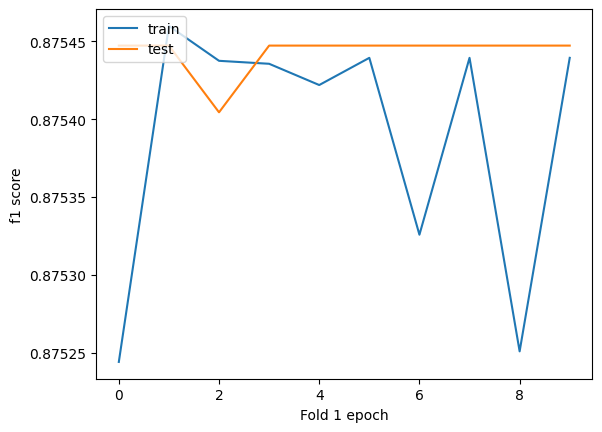

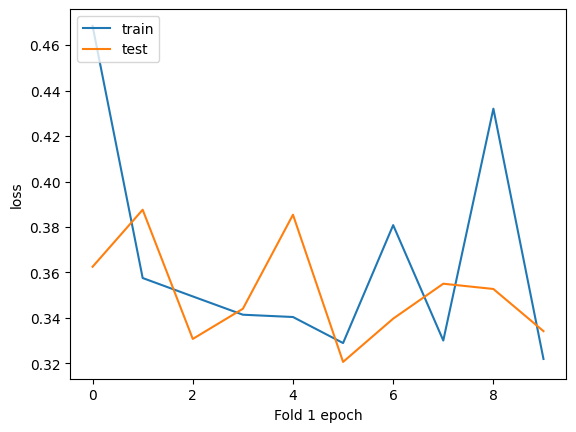





Fold 2 

Epoch 1/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - f1_score: 0.8753 - loss: 0.5602 - val_f1_score: 0.8758 - val_loss: 0.3312
Epoch 2/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - f1_score: 0.8746 - loss: 0.3709 - val_f1_score: 0.8754 - val_loss: 0.3237
Epoch 3/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - f1_score: 0.8760 - loss: 0.3302 - val_f1_score: 0.8754 - val_loss: 0.3706
Epoch 4/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - f1_score: 0.8745 - loss: 0.3932 - val_f1_score: 0.8754 - val_loss: 0.3225
Epoch 5/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - f1_score: 0.8743 - loss: 0.3510 - val_f1_score: 0.8755 - val_loss: 0.3142
Epoch 6/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - f1_score: 0.8758 - loss: 0.3391 - val_f1_score: 0.8754 - val_loss: 0.3103
Epoch 7/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - f1_score: 0.8755 - loss: 0.3299 - val_f1_score: 0.8754 - val_loss: 0.3149
Epoch 8/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - f1_score: 0.8743 -

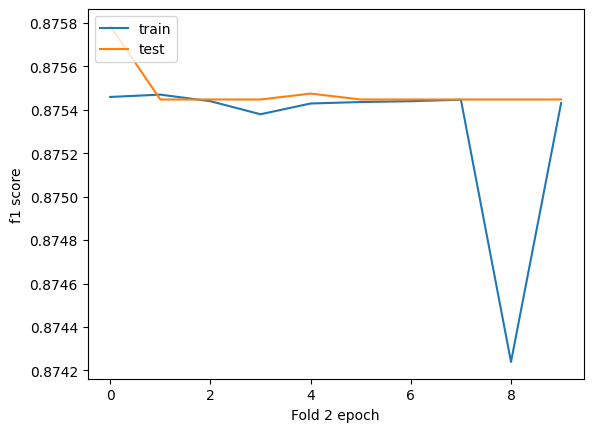

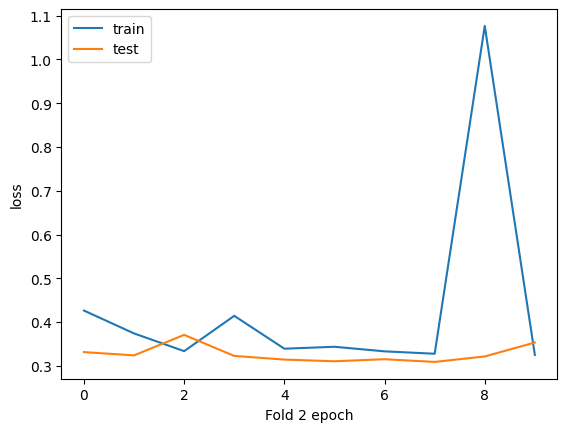





Fold 3 

Epoch 1/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - f1_score: 0.8752 - loss: 0.7669 - val_f1_score: 0.8754 - val_loss: 0.3256
Epoch 2/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - f1_score: 0.8754 - loss: 0.3657 - val_f1_score: 0.8754 - val_loss: 0.3257
Epoch 3/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - f1_score: 0.8744 - loss: 0.3292 - val_f1_score: 0.8754 - val_loss: 0.3652
Epoch 4/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - f1_score: 0.8745 - loss: 0.3533 - val_f1_score: 0.8754 - val_loss: 0.5949
Epoch 5/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - f1_score: 0.8725 - loss: 2.0733 - val_f1_score: 0.8754 - val_loss: 0.3172
Epoch 6/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - f1_score: 0.8742 - loss: 0.3374 - val_f1_score: 0.8754 - val_loss: 0.3111
Epoch 7/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - f1_score: 0.8755 - loss: 0.3330 - val_f1_score: 0.8754 - val_loss: 0.3173
Epoch 8/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - f1_score: 0.8736

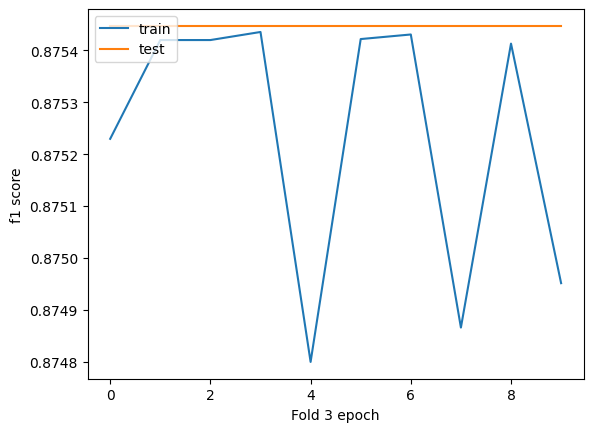

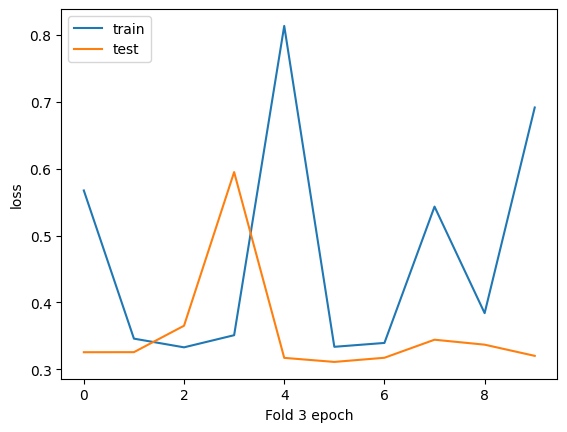





Fold 4 

Epoch 1/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - f1_score: 0.8755 - loss: 0.6315 - val_f1_score: 0.8754 - val_loss: 0.3571
Epoch 2/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - f1_score: 0.8738 - loss: 0.3483 - val_f1_score: 0.8754 - val_loss: 0.3397
Epoch 3/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - f1_score: 0.8762 - loss: 0.3697 - val_f1_score: 0.8754 - val_loss: 0.3555
Epoch 4/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - f1_score: 0.8764 - loss: 0.3506 - val_f1_score: 0.8754 - val_loss: 0.4334
Epoch 5/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - f1_score: 0.8759 - loss: 0.3621 - val_f1_score: 0.8754 - val_loss: 0.3228
Epoch 6/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - f1_score: 0.8743 - loss: 0.4615 - val_f1_score: 0.8754 - val_loss: 19.4512
Epoch 7/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - f1_score: 0.8707 - loss: 4.5560 - val_f1_score: 0.8754 - val_loss: 0.3418
Epoch 8/10
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - f1_score: 0.8751 

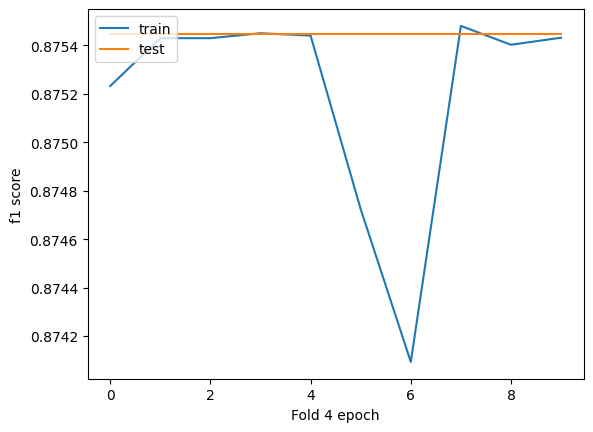

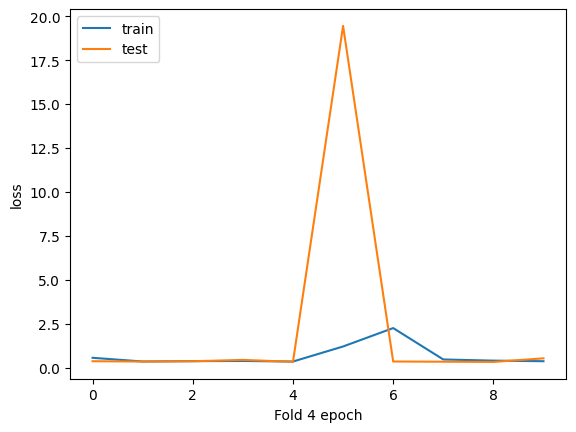

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



cat_cols = X.select_dtypes(exclude=[np.number]).columns
num_cols = X.select_dtypes(include=[np.number]).columns


ct = ColumnTransformer(
    [
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
    ], remainder='passthrough'
)



def create_model(arg):
  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=[arg, ]),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(100, kernel_initializer='he_normal'),
      tf.keras.layers.PReLU(),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(50, kernel_initializer='he_normal'),
      tf.keras.layers.PReLU(),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(20, kernel_initializer='he_normal'),
      tf.keras.layers.PReLU(),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(5, kernel_initializer='he_normal'),
      tf.keras.layers.PReLU(),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      loss='binary_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-02),
      metrics=['f1_score', 'precision', 'recall']
  )

  return model



sss = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=42)


for i, (train_index, test_index) in enumerate(sss.split(X, y)):
  print(f'Fold {i+1}', '\n')
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  X_train_transformed = ct.fit_transform(X_train)
  X_test_transformed = ct.transform(X_test)
  model = create_model(X_train_transformed.shape[1])
  history = model.fit(X_train_transformed, y_train, validation_data=(X_test_transformed, y_test), epochs=10)
  print('average training f1 score: ', np.mean(history.history['f1_score']), '\t', 'average test f1 score: ', np.mean(history.history['val_f1_score']))
  plt.plot(history.history['f1_score'])
  plt.plot(history.history['val_f1_score'])
  plt.xlabel(f'Fold {i+1} epoch')
  plt.ylabel('f1 score')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel(f'Fold {i+1} epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()


  print('\n'*3)





Epoch 1/150
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - f1_score: 0.8757 - loss: 0.4742 - val_f1_score: 0.8755 - val_loss: 0.3644
Epoch 2/150
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - f1_score: 0.8769 - loss: 0.3609 - val_f1_score: 0.8754 - val_loss: 0.3255
Epoch 3/150
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - f1_score: 0.8738 - loss: 0.3261 - val_f1_score: 0.8754 - val_loss: 0.3303
Epoch 4/150
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - f1_score: 0.8753 - loss: 0.3247 - val_f1_score: 0.8754 - val_loss: 0.3224
Epoch 5/150
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - f1_score: 0.8749 - loss: 0.3159 - val_f1_score: 0.8754 - val_loss: 0.3520
Epoch 6/150
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - f1_score: 0.8771 - loss: 0.3198 - val_f1_score: 0.8754 - val_loss: 0.3201
Epoch 7/150
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - f1_score: 0.8739 - loss: 0.3176 - val_f1_score: 0.8754 - val_loss: 0.3397
Epoch 8/150
2259/2259 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - f1_score: 0.8755 - loss: 

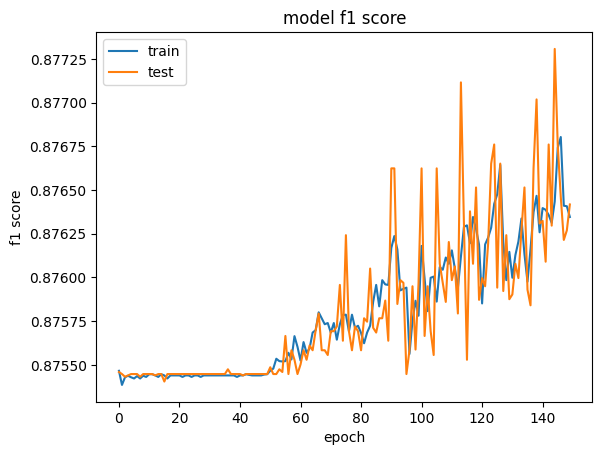

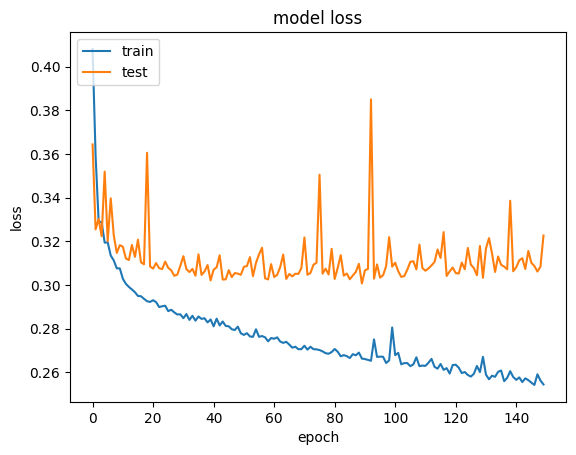

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)


def create_model(arg):
  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=[arg, ]),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, kernel_initializer='he_normal'),
      tf.keras.layers.PReLU(),
      tf.keras.layers.Dense(50, kernel_initializer='he_normal'),
      tf.keras.layers.PReLU(),
      tf.keras.layers.Dense(10, kernel_initializer='he_normal'),
      tf.keras.layers.PReLU(),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      loss='binary_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-03),
      metrics=['f1_score']
  )

  return model





model = create_model(X_train_transformed.shape[1])
history = model.fit(X_train_transformed, y_train, validation_data=(X_test_transformed, y_test), epochs=150)
print('average training f1 score: ', np.mean(history.history['f1_score']), '\t', 'average test f1 score: ', np.mean(history.history['val_f1_score']), '\n'*3)
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.xlabel(f'epoch')
plt.ylabel('f1 score')
plt.title('model f1 score')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n'*3)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel(f'epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y)


def create_model(arg):
  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=[arg, ]),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, kernel_initializer='he_normal'),
      tf.keras.layers.PReLU(),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(50, kernel_initializer='he_normal'),
      tf.keras.layers.PReLU(),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, kernel_initializer='he_normal'),
      tf.keras.layers.PReLU(),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      loss='binary_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=5e-04),
      metrics=['f1_score', 'precision', 'recall']
  )

  return model


X_train_transformed = ct.fit_transform(X_train)
X_valid_transformed = ct.transform(X_valid)
X_test_transformed = ct.transform(X_test)
model = create_model(X_train_transformed.shape[1])

history = model.fit(X_train_transformed, y_train, validation_data=(X_valid_transformed, y_valid), epochs=30)

## Sequential API Approach

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[12, ]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 32, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ELU(),
    tf.keras.layers.Dense(units = 32, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ELU(),
    tf.keras.layers.Dense(units = 32, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ELU(),
    tf.keras.layers.Dense(units = 1, activation='sigmoid')
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(1e-2),
    metrics = ['Accuracy']
)

## Functional API Approach

In [ ]:
input_ = tf.keras.Input(shape = dontforgettowrite.shape[1:])

dense1 = tf.keras.layers.Dense(units = 32, activation='elu', kernel_initializer='he_normal')
dense2 = tf.keras.layers.Dense(units = 32, activation='elu', kernel_initializer='he_normal')
dense3 = tf.keras.layers.Dense(units = 32, activation='elu', kernel_initializer='he_normal')
dense4 = tf.keras.layers.Dense(units = 1, activation='sigmoid')
concat = tf.keras.layers.Concatenate()
norm_layer = tf.keras.layers.Normalization()
batch_norm_1 = tf.keras.layers.BatchNormalization()
batch_norm_2 = tf.keras.layers.BatchNormalization()
batch_norm_3 = tf.keras.layers.BatchNormalization()

normalized = norm_layer(input_)
after_dense1 = dense1(normalized)
after_dense1_batchnormed = batch_norm_1(after_dense1)
after_dense2 = dense2(after_dense1_batchnormed)
after_dense2_batchnormed = batch_norm_2(after_dense2)
after_dense3 = dense3(after_dense2_batchnormed)
after_dense3_batchnormed = batch_norm_3(after_dense3)
concatted = concat([after_dense3_batchnormed, normalized])

output_ = dense4(concatted)

model = tf.keras.Model(inputs=[input_], outputs=[output_])
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(1e-02),
    metrics=['Accuracy']
)

